In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [11]:
df=pd.read_excel("Datasets/Concrete_Data.xls")

In [12]:
df.head(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement (component 1)(kg in a m^3 mixture),1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Blast Furnace Slag (component 2)(kg in a m^3 mixture),1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fly Ash (component 3)(kg in a m^3 mixture),1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water (component 4)(kg in a m^3 mixture),1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer (component 5)(kg in a m^3 mixture),1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse Aggregate (component 6)(kg in a m^3 mixture),1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine Aggregate (component 7)(kg in a m^3 mixture),1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age (day),1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
"Concrete compressive strength(MPa, megapascals)",1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


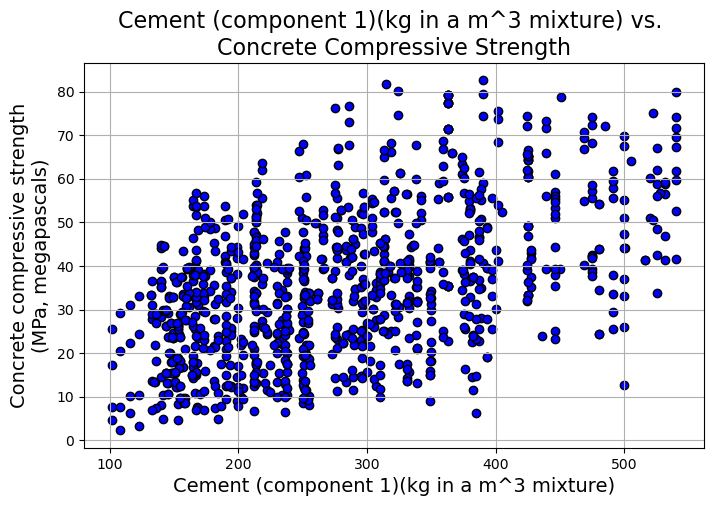

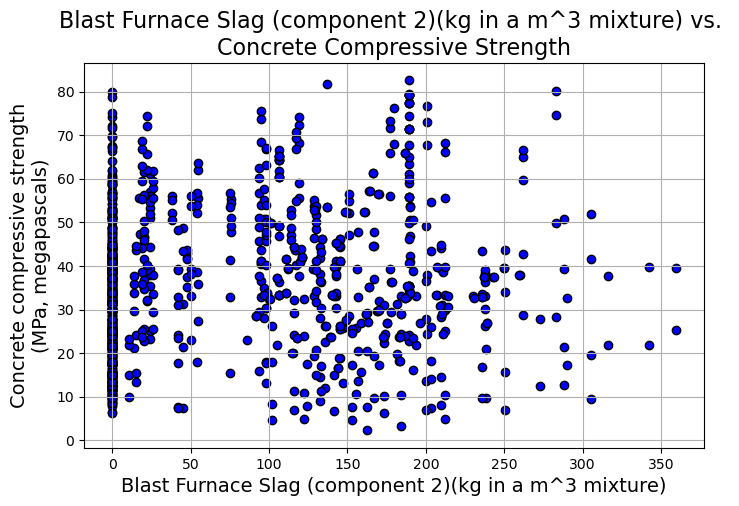

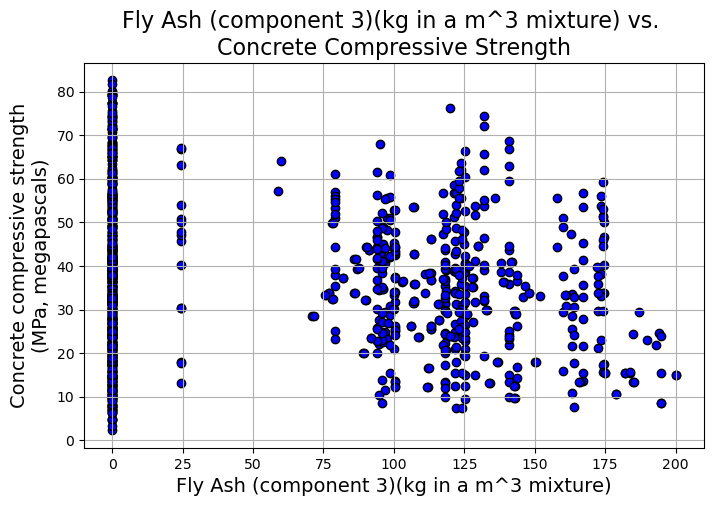

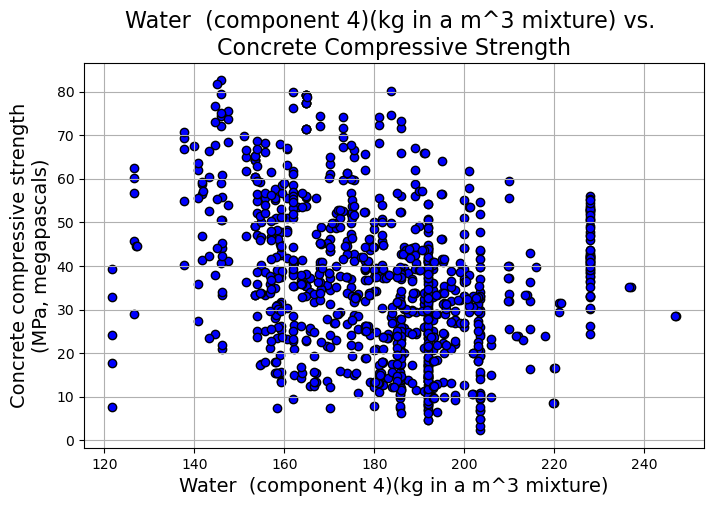

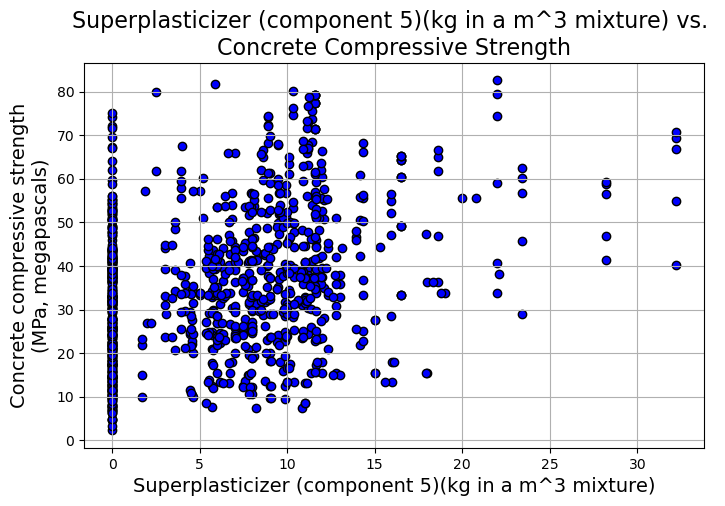

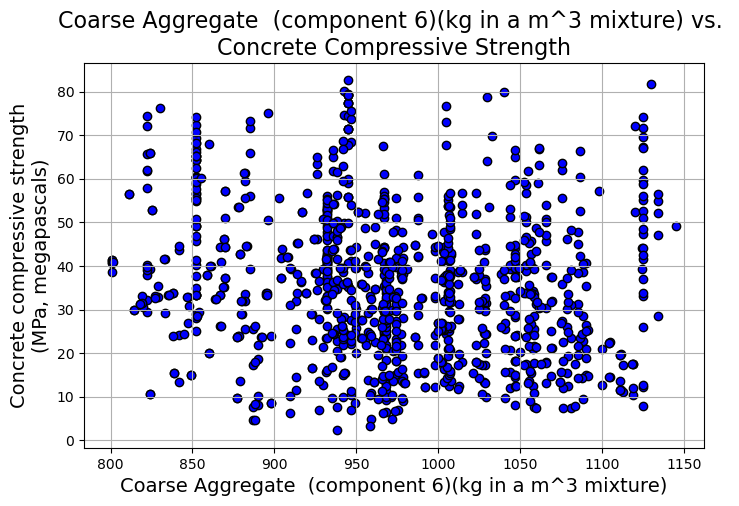

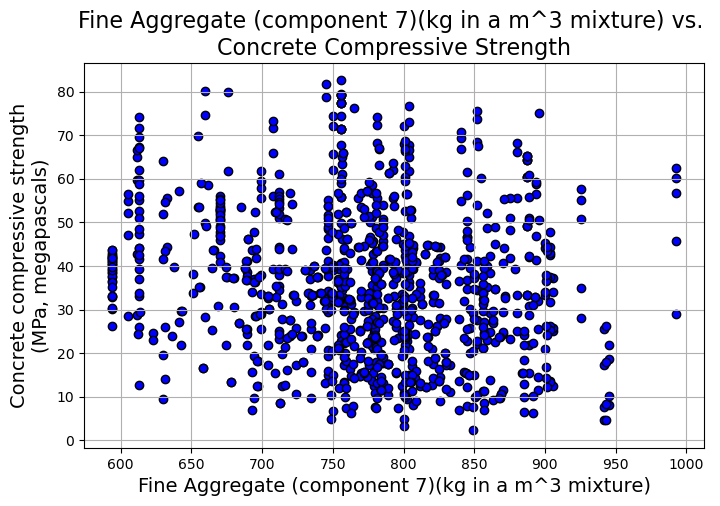

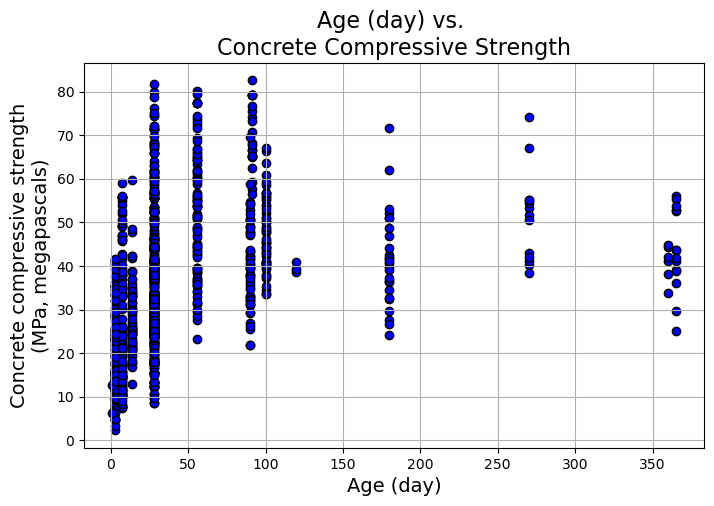

In [17]:
for c in df.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nConcrete Compressive Strength".format(c), fontsize=16)
    plt.scatter(x=df[c], y=df['Concrete compressive strength(MPa, megapascals) '], color='blue', edgecolor='k')
    plt.grid(True)
    plt.xlabel(c, fontsize=14)
    plt.ylabel('Concrete compressive strength\n(MPa, megapascals)',fontsize=14)
    plt.show()

In [18]:
df1 = df.copy()

In [20]:
df1.columns=['Component' + str(i) for i in range(1,8)]+['Age']+['y']

In [21]:
df1.head()

,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Age,y
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [22]:
from seaborn import pairplot

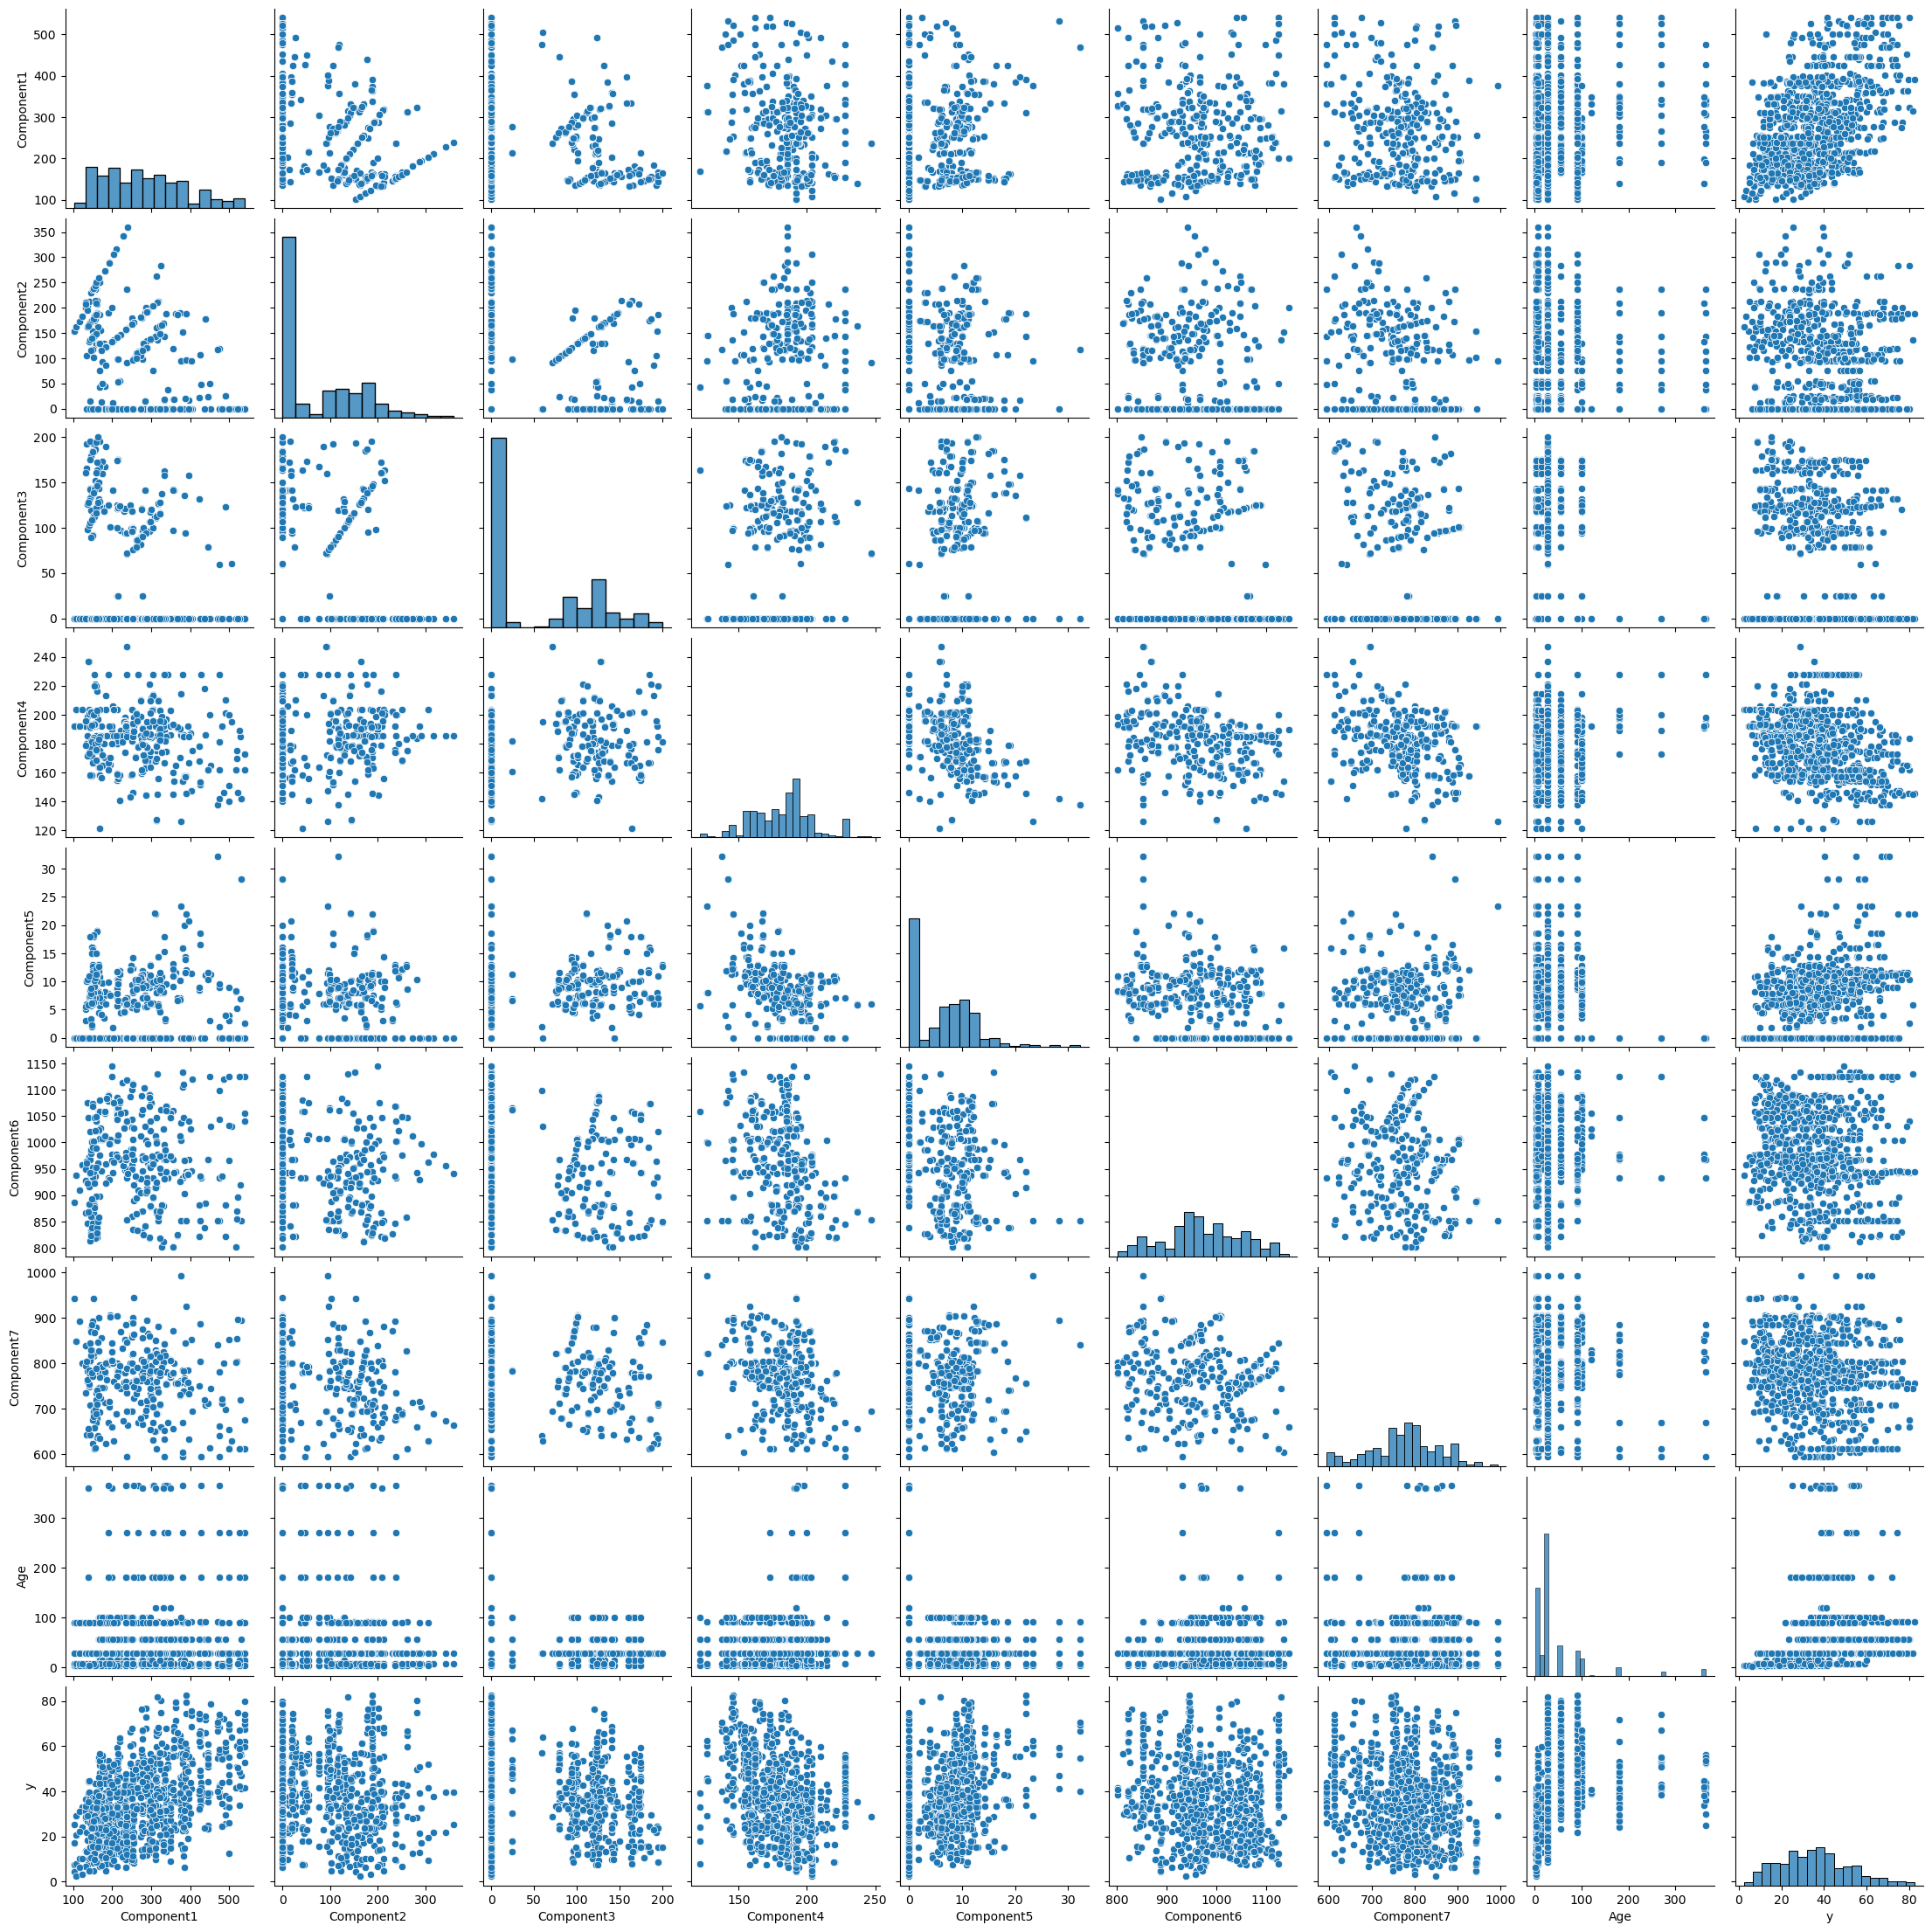

In [23]:
pairplot(df1)

In [24]:
corr = df1[:-1].corr()

In [25]:
corr

,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Age,y
Component1,1.000000,-0.275153,-0.397439,-0.081408,0.092856,-0.109725,-0.222755,0.081899,0.497813
Component2,-0.275153,1.000000,-0.323720,0.107065,0.043261,-0.283862,-0.281564,-0.044166,0.134895
Component3,-0.397439,-0.323720,1.000000,-0.257488,0.377248,-0.009475,0.079138,-0.154284,-0.105688
Component4,-0.081408,0.107065,-0.257488,1.000000,-0.658118,-0.181344,-0.450683,0.277965,-0.289554
Component5,0.092856,0.043261,0.377248,-0.658118,1.000000,-0.266031,0.222580,-0.192630,0.366218
Component6,-0.109725,-0.283862,-0.009475,-0.181344,-0.266031,1.000000,-0.178881,-0.003398,-0.165365
Component7,-0.222755,-0.281564,0.079138,-0.450683,0.222580,-0.178881,1.000000,-0.156143,-0.167284
Age,0.081899,-0.044166,-0.154284,0.277965,-0.192630,-0.003398,-0.156143,1.000000,0.328841
y,0.497813,0.134895,-0.105688,-0.289554,0.366218,-0.165365,-0.167284,0.328841,1.000000


In [26]:
from statsmodels.graphics.correlation import plot_corr

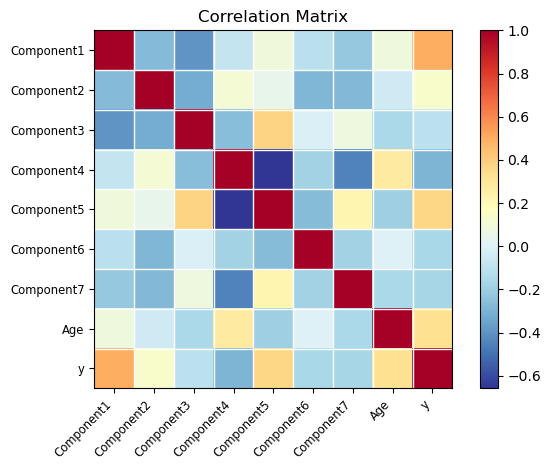

In [27]:
fig=plot_corr(corr, xnames=corr.columns)

In [28]:
formula_str = df1.columns[-1] + ' ~ '+'+'.join(df1.columns[:-1])
formula_str

'y ~ Component1+Component2+Component3+Component4+Component5+Component6+Component7+Age'

In [29]:
model=sm.ols(formula=formula_str, data=df1)

In [40]:
fitted=model.fit()

In [41]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     204.3
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          6.76e-206
Time:                        23:07:04   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -23.1638     26.588     -0.871      0.3

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['Features'] = df1.columns
vif

,VIF Factor,Features
0,26.248178,Component1
1,4.444466,Component2
2,4.561734,Component3
3,92.512523,Component4
4,5.520316,Component5
5,85.900013,Component6
6,73.522864,Component7
7,2.434882,Age
8,14.555916,y


In [59]:
df_result = pd.DataFrame()

In [60]:
df_result['pvalues'] = fitted.pvalues[1:]

In [61]:
df_result['Features'] = df1.columns[:-1]

In [62]:
df_result.set_index('Features',inplace=True)

In [63]:
def yes_no(b):
    if b > 0.05:
        return 'Yes'
    else:
        return 'No'

In [64]:
df_result['Statistically significant?']=df_result['pvalues'].apply(yes_no)

In [65]:
df_result

,pvalues,Statistically significant?
Features,,
Component1,1.962842e-41,No
Component2,1.633083e-23,No
Component3,5.029952e-12,No
Component4,1.937337e-04,No
Component5,1.920901e-03,No
Component6,5.522656e-02,Yes
Component7,5.996805e-02,Yes
Age,5.841045e-82,No


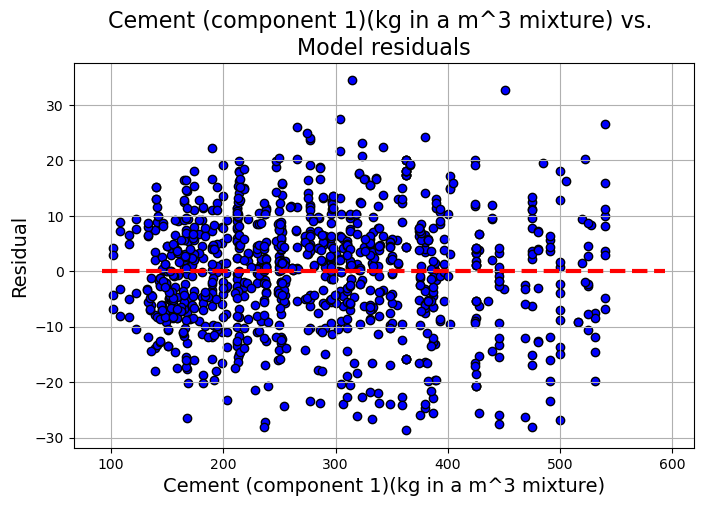

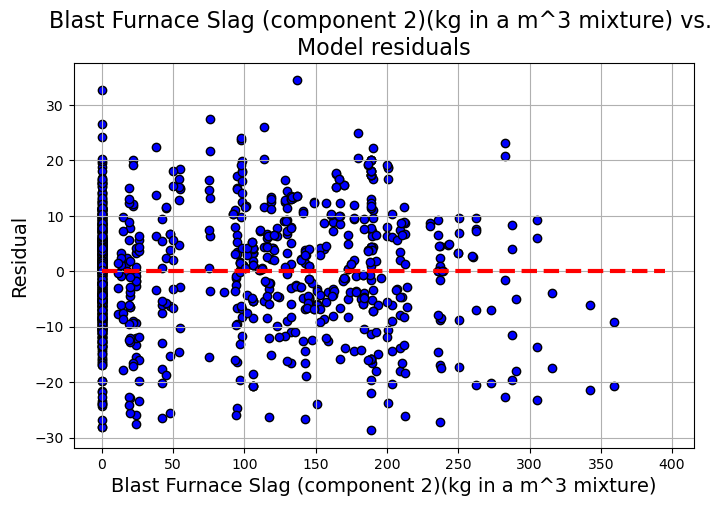

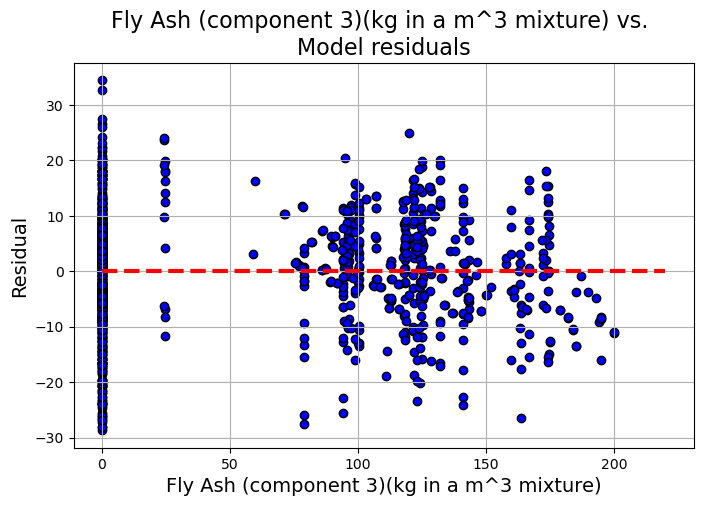

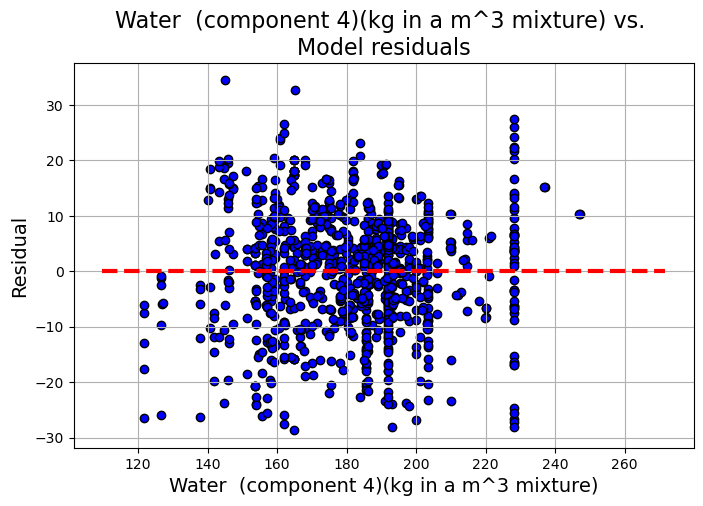

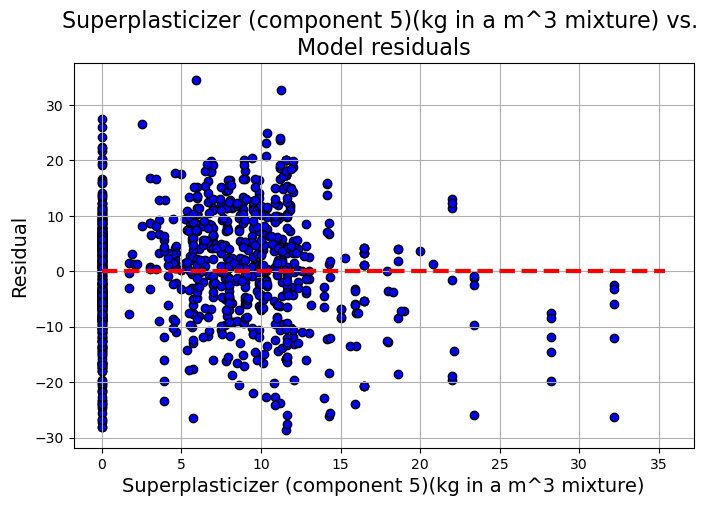

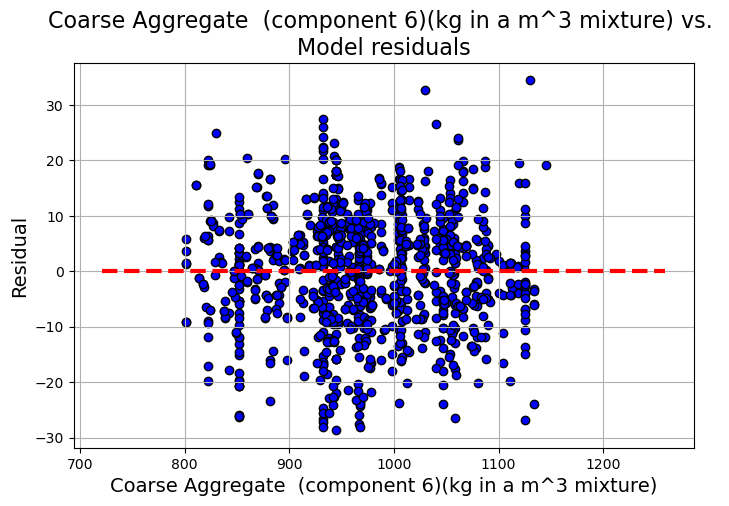

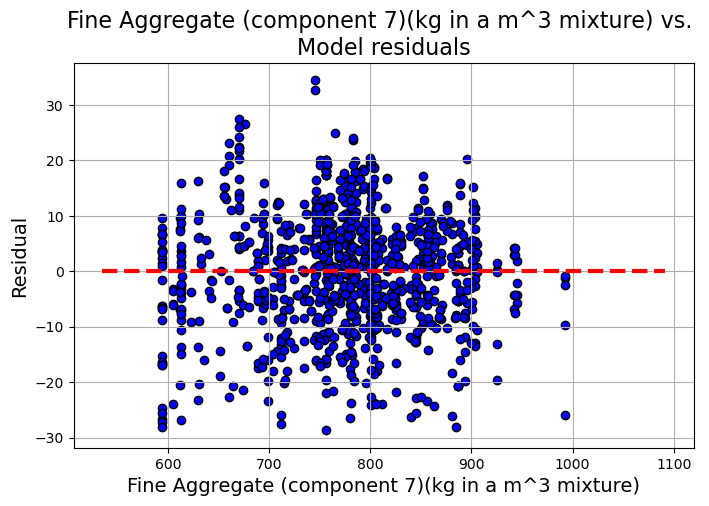

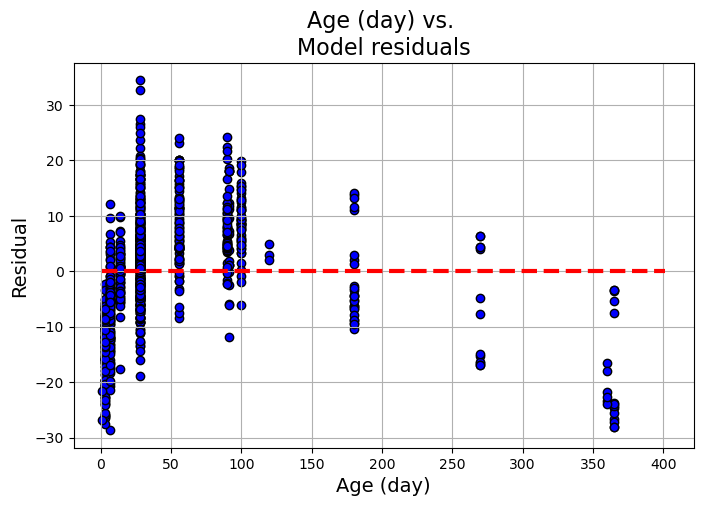

In [68]:
for c in df.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nModel residuals".format(c), fontsize=16)
    plt.scatter(x=df[c], y=fitted.resid, color='blue', edgecolor='k')
    plt.grid(True)
    xmin=min(df[c])
    xmax=max(df[c])
    plt.hlines(y=0, xmin=xmin*0.9, xmax=xmax*1.1, color='red', linestyle='--', lw=3)
    plt.xlabel(c, fontsize=14)
    plt.ylabel('Residual', fontsize=14)
    plt.show()

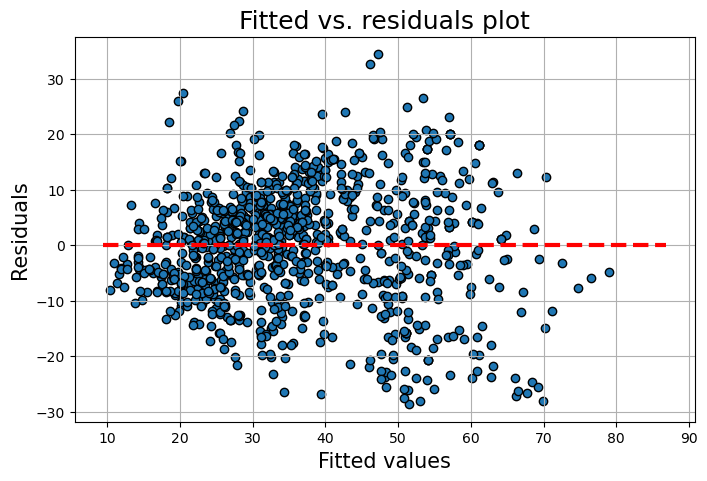

In [69]:
plt.figure(figsize=(8,5))
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
xmin=min(fitted.fittedvalues)
xmax = max(fitted.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

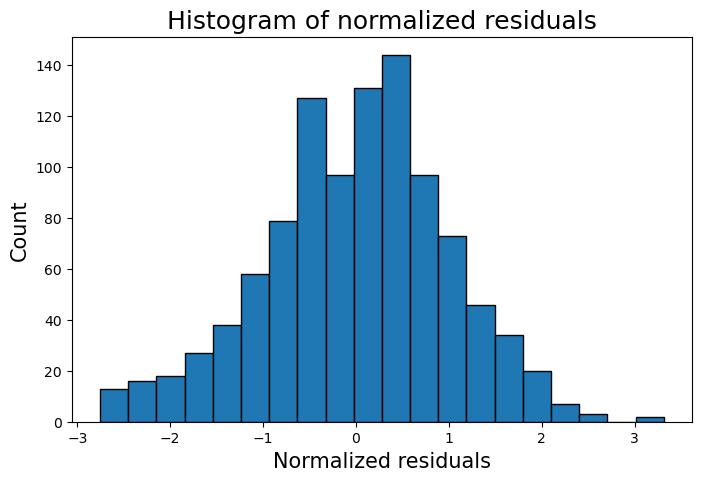

In [70]:
plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=20,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

In [71]:
from statsmodels.graphics.gofplots import qqplot

<Figure size 800x500 with 0 Axes>

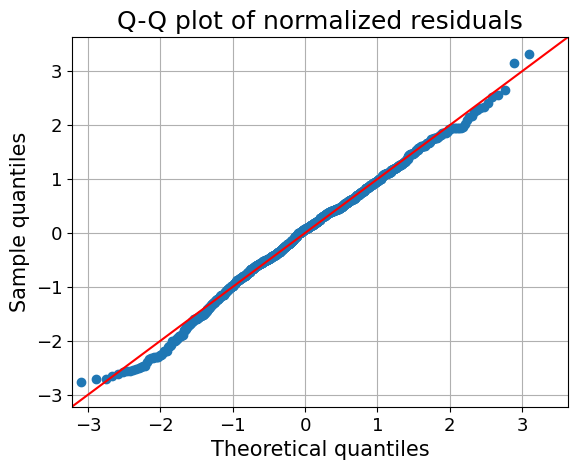

In [72]:
plt.figure(figsize=(8,5))
fig=qqplot(fitted.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

In [73]:
from scipy.stats import shapiro

In [74]:
_,p=shapiro(fitted.resid)

In [75]:
if p<0.01:
    print("The residuals seem to come from Gaussian process")
else:
    print("The normality assumption may not hold")

The residuals seem to come from Gaussian process


In [76]:
from statsmodels.stats.outliers_influence import OLSInfluence as influence

In [77]:
inf=influence(fitted)

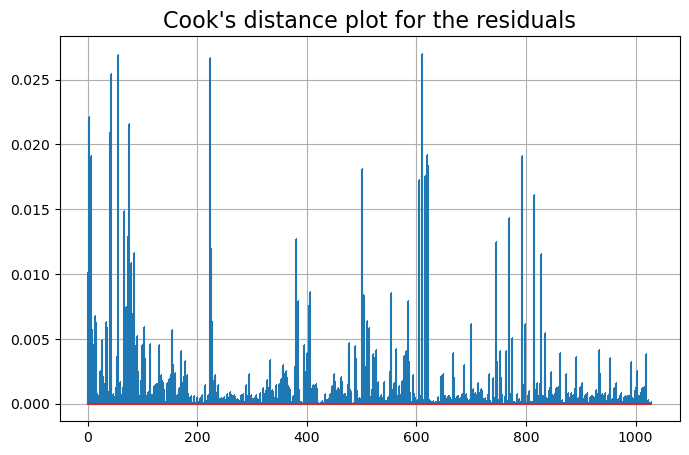

In [78]:

(c, p) = inf.cooks_distance
plt.figure(figsize=(8,5))
plt.title("Cook's distance plot for the residuals",fontsize=16)
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.grid(True)
plt.show()

* ERROR : ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.
> - 해결 xlrd 설치 , pip install xlrd
-------------------
* Multicollinearity : 다중공선성
-------------------
* 다중공선성 확인 방법
* 1. fitted.summary() 의 노트 부분에서 condition number 값 확인 
> - Condition Number(조건수)가 낮을 수록 Overfitting(과적합)이 낮게 일어남. 
* 2. VIF(Variance Inflation Factor) : 분산팽창요인, VIF > 10 크면 다중공선성이 있다고 판단함.
> - from statsmodels.stats.outliers_influence import variance_inflation_factor
> - 10 넘는 게 여러개 있다면 하나씩 지우면서 vif값 다시 확인
> - vif가 10이란 것은 r^2이 0.9인 경우
* $$ VIF_i = \frac{1}{1-R_i^2} $$
-------------------
* plt.hlines 함수 확인하기
-------------------
* 잔차 vs 각 설명변수 비교 산포도
> - 전체적인 분포가 y=0 축을 중심으로 랜덤하게 보이기 때문에 선형성, 독립성 모두 유지된다고 해도 됨.